# 🧬 BioKG EDA Notebook - Drug-Drug Interaction Graph Project

**Objective**: Understand the structure, composition, and potential of the `ogbl-biokg` biomedical knowledge graph for predicting Drug-Drug Interactions (DDIs).

**Goals**:
- Explore BioKG's heterogeneous structure
- Identify drug-related relationships
- Prepare for model development and Kaggle dataset generation

**Data Source**: [OGB - BioKG](https://ogb.stanford.edu/docs/linkprop/#ogbl-biokg)
- [BioKG Paper](https://arxiv.org/abs/2004.00526)
- [BioKG Dataset](https://ogb.stanford.edu/docs/linkprop/#ogbl-biokg)

## What is BioKG?
BioKG is a large-scale biomedical knowledge graph containing:

- Entities (nodes): drugs, proteins, diseases, side effects, functions

- Relations (edges): interactions like "inhibits", "treats", "associated_with", etc.

- BioKG includes multi-relational triplets, ideal for link prediction tasks.

In [5]:
%pip install ogb

import torch
import pandas as pd
import matplotlib.pyplot as plt
from ogb.linkproppred import LinkPropPredDataset


Note: you may need to restart the kernel to use updated packages.


In [6]:
dataset = LinkPropPredDataset(name='ogbl-biokg')
data = dataset[0]

edge_index_dict = data['edge_index_dict']
num_nodes_dict = data['num_nodes_dict']


In [7]:
# View node types and relation types
node_types = set()
relation_types = []

for (src, rel, dst) in edge_index_dict.keys():
    node_types.update([src, dst])
    relation_types.append(rel)

print("🧬 Node Types:", sorted(node_types))
print("🔗 Relation Types:", sorted(set(relation_types)))


🧬 Node Types: ['disease', 'drug', 'function', 'protein', 'sideeffect']
🔗 Relation Types: ['disease-protein', 'drug-disease', 'drug-drug_acquired_metabolic_disease', 'drug-drug_bacterial_infectious_disease', 'drug-drug_benign_neoplasm', 'drug-drug_cancer', 'drug-drug_cardiovascular_system_disease', 'drug-drug_chromosomal_disease', 'drug-drug_cognitive_disorder', 'drug-drug_cryptorchidism', 'drug-drug_developmental_disorder_of_mental_health', 'drug-drug_endocrine_system_disease', 'drug-drug_fungal_infectious_disease', 'drug-drug_gastrointestinal_system_disease', 'drug-drug_hematopoietic_system_disease', 'drug-drug_hematopoietic_system_diseases', 'drug-drug_hypospadias', 'drug-drug_immune_system_disease', 'drug-drug_inherited_metabolic_disorder', 'drug-drug_integumentary_system_disease', 'drug-drug_irritable_bowel_syndrome', 'drug-drug_monogenic_disease', 'drug-drug_musculoskeletal_system_disease', 'drug-drug_nervous_system_disease', 'drug-drug_orofacial_cleft', 'drug-drug_parasitic_infec

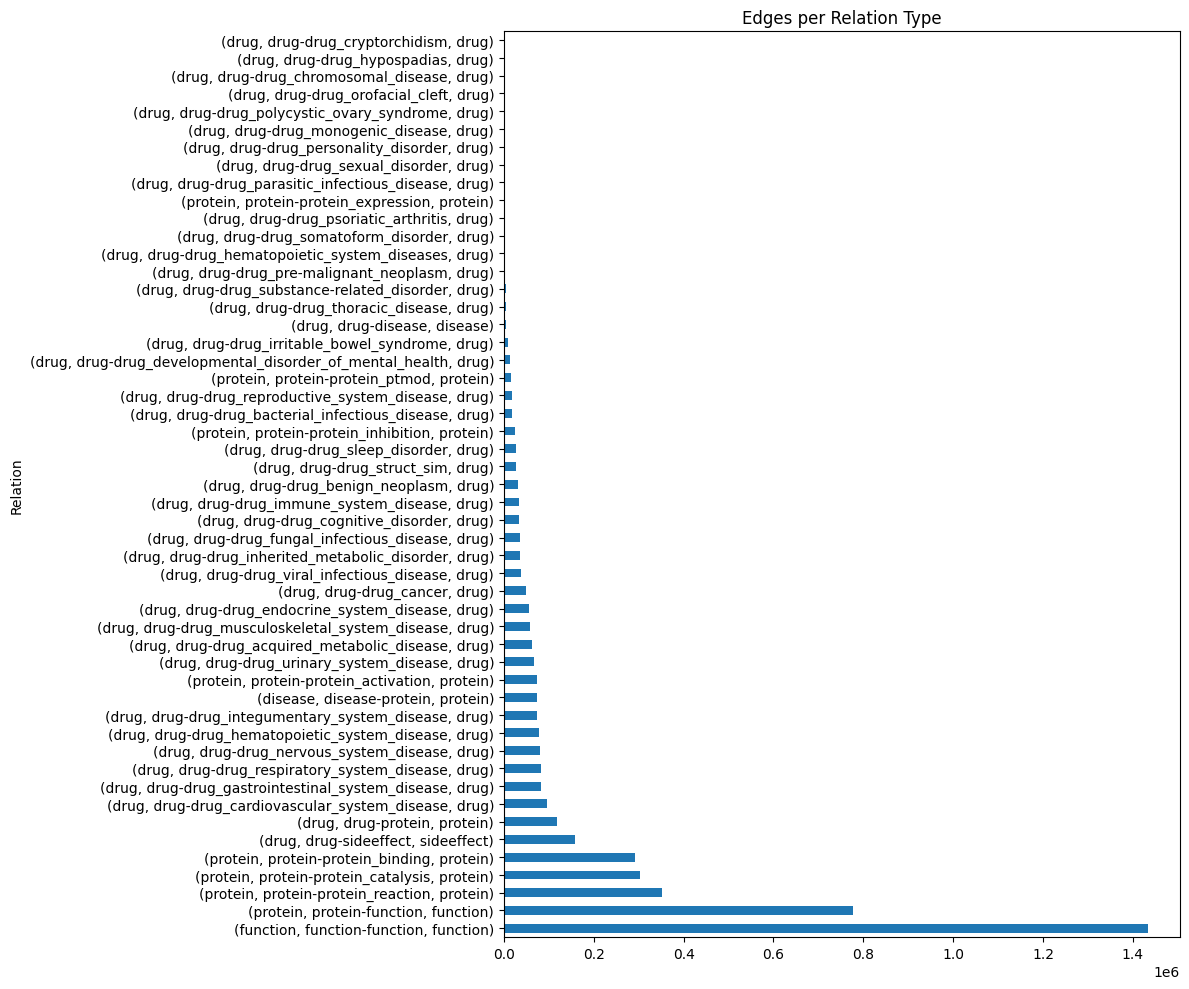

In [8]:
edge_counts = []
for k, v in edge_index_dict.items():
    edge_counts.append((k, v.shape[1]))

edge_df = pd.DataFrame(edge_counts, columns=["Relation", "Edge Count"]).sort_values("Edge Count", ascending=False)
edge_df.plot(kind='barh', x='Relation', y='Edge Count', figsize=(12, 10), legend=False, title="Edges per Relation Type")
plt.tight_layout()
plt.show()


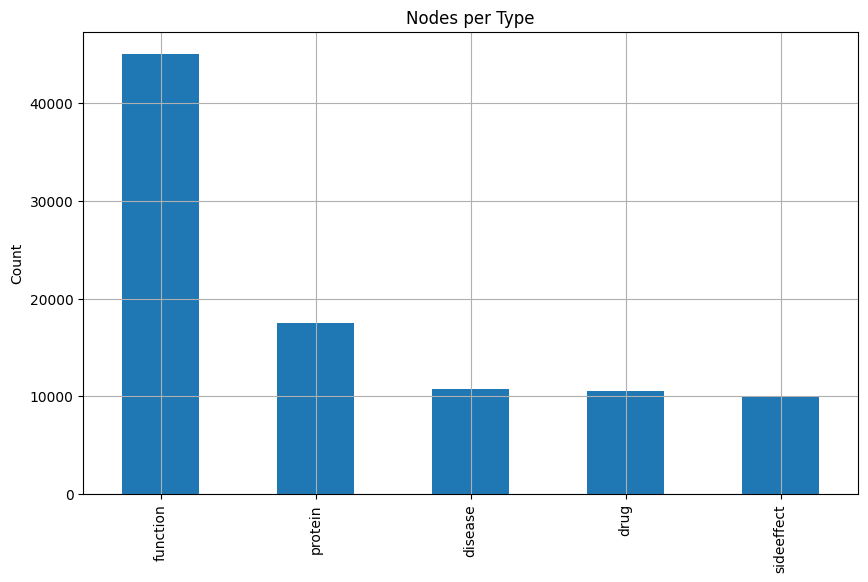

In [9]:
node_df = pd.DataFrame.from_dict(num_nodes_dict, orient='index', columns=['Node Count']).sort_values('Node Count', ascending=False)
node_df.plot(kind='bar', figsize=(10,6), legend=False, title="Nodes per Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [10]:
# Find relations that start and end with 'drug'
drug_drug_relations = [k for k in edge_index_dict if k[0] == 'drug' and k[2] == 'drug']

for rel in drug_drug_relations:
    print(f"{rel}: {edge_index_dict[rel].shape[1]} edges")


('drug', 'drug-drug_acquired_metabolic_disease', 'drug'): 63430 edges
('drug', 'drug-drug_bacterial_infectious_disease', 'drug'): 18554 edges
('drug', 'drug-drug_benign_neoplasm', 'drug'): 30348 edges
('drug', 'drug-drug_cancer', 'drug'): 48514 edges
('drug', 'drug-drug_cardiovascular_system_disease', 'drug'): 94842 edges
('drug', 'drug-drug_chromosomal_disease', 'drug'): 316 edges
('drug', 'drug-drug_cognitive_disorder', 'drug'): 34660 edges
('drug', 'drug-drug_cryptorchidism', 'drug'): 128 edges
('drug', 'drug-drug_developmental_disorder_of_mental_health', 'drug'): 14314 edges
('drug', 'drug-drug_endocrine_system_disease', 'drug'): 55994 edges
('drug', 'drug-drug_fungal_infectious_disease', 'drug'): 36114 edges
('drug', 'drug-drug_gastrointestinal_system_disease', 'drug'): 83210 edges
('drug', 'drug-drug_hematopoietic_system_disease', 'drug'): 79202 edges
('drug', 'drug-drug_hematopoietic_system_diseases', 'drug'): 3006 edges
('drug', 'drug-drug_hypospadias', 'drug'): 292 edges
('dru

In [11]:
summary = {
    "Total Node Types": len(node_types),
    "Total Relation Types": len(set(relation_types)),
    "Total Edge Triplets": sum(v.shape[1] for v in edge_index_dict.values()),
    "Total Drug-Drug Relations": len(drug_drug_relations),
}
pd.DataFrame.from_dict(summary, orient='index', columns=['Value'])


,Value
Total Node Types,5
Total Relation Types,51
Total Edge Triplets,4762678
Total Drug-Drug Relations,38


### Export Drug-Drug Triplets for Kaggle Prep

In [12]:
ddi_rows = []
for (src, rel, dst), edge_index in edge_index_dict.items():
    if src == 'drug' and dst == 'drug':
        for i in range(edge_index.shape[1]):
            head = edge_index[0, i].item()
            tail = edge_index[1, i].item()
            ddi_rows.append((head, rel, tail))

ddi_df = pd.DataFrame(ddi_rows, columns=["drug_1", "relation", "drug_2"])
ddi_df.to_csv("drug_drug_edges.csv", index=False)


### Next Steps

1. Convert this dataset to `HeteroData` format for use with PyTorch Geometric models.
2. Train a Knowledge Graph Neural Network (e.g., R-GCN or CompGCN).
3. Apply GNNExplainer for interpretability.
4. Package high-quality filtered triplets into a Kaggle-ready dataset.
